# Rostros con openCV y entrenamiento Equipo Dinamita






### Importar bibliotecas

In [6]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

### Etiquetas

In [7]:
subjects = ["", "Fernando", "Eydrel","Sergio","Gerardo","Ana"]

### Detectar rostros por medio de una función

In [8]:
def detect_face(img):
    #Se convierte la imagen a escala de grises para ser usada por el detector
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    #Se lee el modelo de clasificador. 
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
 
    #Se detectan rostros y se almacenan en la variable faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
 
    #Si no se detecta rostros se regresa la imagen original
    if (len(faces) == 0):
        return None, None
 
    #Suponemos que solo tendremos un rostro
    #Se extra el área del rostro
    (x, y, w, h) = faces[0]
 
    #Se regresa únicamente la parte del rostro en la imagen
    return gray[y:y+w, x:x+h], faces[0]

### Lectura de la base de datos y preparación de los datos para su entrenamiento

In [9]:
def prepare_training_data(data_folder_path):
    
    #------Paso 1--------
    #Obten las carpetas dentro de la ruta con las imagenes de entrenamiento. Cada carpeta corresponde a un sujeto.
    dirs = os.listdir(data_folder_path)
    
    #Lista que contendrá las caras de todos los sujetos
    faces = []
    #Lista que contendrá las etiquetas de todos los sujetos
    labels = []
    
    # Navegamos a traves de todas las carpetas y leemos las imágenes dentro de cada carpeta
    for dir_name in dirs:
        
        # Las carpetas de cada sujeto empiezan con la letra 's', por lo tanto, cualquier carpeta que no empeza con s se ignora
        if not dir_name.startswith("s"):
            continue;
            
        #------Paso 2--------
        # Se extrae el número de etiqueta del sujeto a partir del nombre de la carpeta
        # Recuerda el formato de la carpeta = slabel
        # Removemos la letra "s" y nos quedamos solo con el número (Esto es la etiqueta)        
        label = int(dir_name.replace("s", ""))
        
        # Construimos la ruta hacia la carpeta que contiene las imagenes del sujeto actual
        # Ejemplo de ruta = "./images/traindata/s1"
        subject_dir_path = data_folder_path + "/" + dir_name
        
        #Se obtienen los nombres de las imagenes que estan dentro de cada carpeta
        subject_images_names = os.listdir(subject_dir_path)
        
        #------Paso 3--------
        #Navegamos a través de cada imagen y la leemos
        #detectamos los rostros y los agregamos a la lista
        for image_name in subject_images_names:
            
            #Para ignorar archivos del sistema como .DS_Store
            if image_name.startswith("."):
                continue;
            
            #se construye la ruta de la imagen que se va a leer
            #Ejemplo de ruta = ./images/traindata/s1/1.jpg
            image_path = subject_dir_path + "/" + image_name

            #leer la imagen
            image = cv2.imread(image_path)
                      
            #detección de rostro (usando la función definida arriba)
            face, rect = detect_face(image)
            
            #------Paso 4--------
            #Para propositos de este tutorial
            #se ignoran los rostros que no son detectados
            if face is not None:
                #se agrega el rostro a la lista de rostros
                faces.append(face)
                #se agrega la etiqueta a la lista de etiquetas
                labels.append(label)
                
    return faces, labels

### Se llama la función prepara datos

In [16]:
print("Preparando datos...")
faces, labels = prepare_training_data("./imagenes/traindata")
print("Datos preparados")

#Se imprime el total de rostros y etiquetas encontrados
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparando datos...
Datos preparados
Total faces:  35
Total labels:  35
[array([[235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235],
       ...,
       [235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235]], dtype=uint8), array([[235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235],
       ...,
       [235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235]], dtype=uint8), array([[235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235],
       ...,
       [235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235],
       [235, 235, 235, ..., 235, 235, 235]], dtype=uint8), array([[235, 235, 235, ..., 235, 235, 235],
       [23

### Reconocimiento de rostros

In [11]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

### Entrenamiento

In [12]:
face_recognizer.train(faces, np.array(labels))

### Dibujar las regiones con rostro

In [13]:
# fucnión para dibujar un rectángulo en la imagen de acuerdo a las coordenadas (x,y) dadas 
# con la altura y anchura width and height
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# función para dibujar texto en una imagen dada empezando desde las coordenadas (x,y) pasadas
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

## Predicción

In [14]:
def predict(test_img):
    #Hacemos una copia para no modificar la imagen original
    img = test_img.copy()
    #Se detecta el rostro de la imagen
    face, rect = detect_face(img)

    #Se predice a que etiqueta pertenece la imagen usando el reconocedor
    (label,confidence)= face_recognizer.predict(face)
    #Se obtiene el nombre del sujeto dada la etiqueta predicha
    label_text = subjects[label]
    
    #Se dibuja un rectangulo en donde esta contenido el rostro
    draw_rectangle(img, rect)
    #Se coloca el nombre de la persona
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

Prediciendo imagenes...
Predicción completa


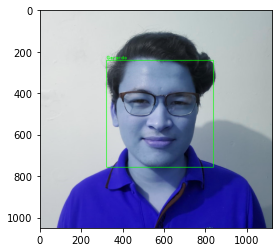

In [27]:
print("Prediciendo imagenes...")

#Cargar imagenes de prueba

test_img4 = cv2.imread("./imagenes/testdata/s4/Gerardo.8.jpg")





#Predecir

predicted_img4 = predict(test_img4)


print("Predicción completa")


#Desplegar imágenes
plt.imshow(predicted_img4)
plt.show()

